# Live: Regressão - Minerando Dados

### Importando as bibliotecas necessárias

In [0]:
import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Carregando a base de dados

In [0]:
df = pd.read_csv('drive/My Drive/Blog/Lives/Live-Regressao/train.csv')

In [51]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Selecionando os atributos

In [52]:
df[['Outlet_Establishment_Year','Item_MRP','Item_Outlet_Sales']][:5]

,Outlet_Establishment_Year,Item_MRP,Item_Outlet_Sales
0,1999,249.8092,3735.1380
1,2009,48.2692,443.4228
2,1999,141.6180,2097.2700
3,1998,182.0950,732.3800
4,1987,53.8614,994.7052


In [0]:
X = df[['Outlet_Establishment_Year','Item_MRP']]

#### Separando os conjuntos de treino e teste


In [0]:
x_train, x_test, y_train, y_test = train_test_split( X, df.Item_Outlet_Sales, test_size=0.3)

#### Verificando o shape dos dados

In [55]:
x_train.shape, y_train.shape

((5966, 2), (5966,))

In [56]:
x_test.shape, y_test.shape

((2557, 2), (2557,))

### Instânciando a Regressão Linear

In [0]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

### Treinando o modelo

In [58]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###  Predizendo os valores para o conjunto de teste

In [0]:
pred = lreg.predict(x_test)

###  Calculando o MSE (Mean Square Error)


In [60]:
mse = np.mean((pred - y_test)**2)
mse

1935473.8953209461

### Calculando os Coeficientes


In [61]:
coeff = DataFrame(x_train.columns)

coeff['Coeficientes'] = Series(lreg.coef_)

coeff

,0,Coeficientes
0,Outlet_Establishment_Year,-10.666430
1,Item_MRP,15.708585


### Calculando o r-squared

In [62]:
lreg.score(x_test,y_test)

0.31595733515856694

### Regressão Linear com mais variáveis.

#### Verificando o atributo Item Weight

In [63]:
df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

#### Verificando e tratando registros nulos

In [64]:
df['Item_Weight'].isnull().sum()

1463

In [0]:
df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True)

#### Selecionando novamente os 3 atributos

In [0]:
X = df.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

#### Separando os conjuntos de treino e teste

In [0]:
x_train, x_test, y_train, y_test = train_test_split( X, df.Item_Outlet_Sales, test_size=0.3)

#### Treinando novamente o modelo

In [68]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Executando a predição e calculando o MSE

In [69]:
pred = lreg.predict(x_test)

mse = np.mean((pred - y_test)**2)

mse

2044201.3699519471

#### Verificando os coeficientes

In [70]:
coeff = DataFrame(x_train.columns)

coeff['Coeficientes'] = Series(lreg.coef_)

coeff

,0,Coeficientes
0,Outlet_Establishment_Year,-9.520464
1,Item_MRP,15.530244
2,Item_Weight,1.308514


#### Calculando o r-squared

In [71]:
lreg.score(x_test,y_test)

0.3213321782110029

### Pre-processamento nos dados para aplicar a Regressão


#### Tratando Missing Values

In [0]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,np.mean(df['Item_Visibility']))

df['Outlet_Establishment_Year'] = 2013 - df['Outlet_Establishment_Year']

df['Outlet_Size'].fillna('Small',inplace=True)

#### Convertendo atributos catégoricos em numéricos

In [73]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [74]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [75]:
df.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

#### Importando o LabelEncoder

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#### Função para aplicar o LabelEncoder em cada atributo

In [0]:
def generate_labelencoder(atts):
  for attr in atts:
    df[attr] = le.fit_transform(df[attr])
  return df

In [0]:
df = generate_labelencoder(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size'])

#### Verificando os dados após a transformação

In [82]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,14,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,4,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,14,1,0,1,2097.2700
3,FDX07,19.20,2,0.066132,6,182.0950,0,15,2,2,0,732.3800
4,NCD19,8.93,1,0.066132,9,53.8614,1,26,0,2,1,994.7052


In [41]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,Medium,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,Medium,443.4228
2,17.50,1,0.016760,10,141.6180,1999,Medium,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,NaN,732.3800
4,8.93,1,0.000000,9,53.8614,1987,High,994.7052


#### Excluindo os atributos de identificador de item e quantidade de vendas

In [0]:
X = df

In [85]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,9,14,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,3,4,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,9,14,1,0,1,2097.2700
3,19.20,2,0.066132,6,182.0950,0,15,2,2,0,732.3800
4,8.93,1,0.066132,9,53.8614,1,26,0,2,1,994.7052


#### Separando os conjuntos de dados em treino e teste

In [0]:
x_train, x_test, y_train, y_test = train_test_split( X, df.Item_Outlet_Sales, test_size=0.3)

#### Treinando o modelo com os atributos selecionados e transformados

In [92]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Realizando a predição e calculando as métricas

In [0]:
pred_cv = lreg.predict(x_test)

#### MSE

In [94]:
mse = np.mean((pred_cv - y_test)**2)
mse

1404575.1487904321

#### R - Squared

In [95]:
lreg.score(x_test,y_test)

0.5192272892610379

### Regularização

#### Verificando a magnitude dos coeficientes

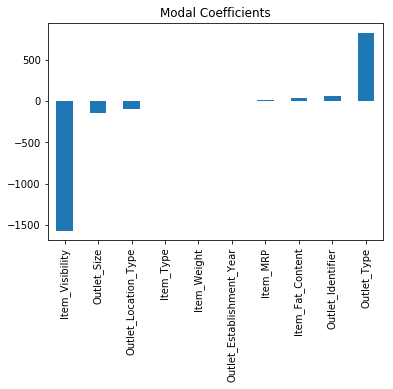

In [96]:
predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients') 

### Ridge Regression

#### Importando e instânciando a classe Ridge

In [0]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)

#### Treinando o modelo

In [98]:
ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

#### Realizando a predição e calculando as métricas

In [99]:
pred = ridgeReg.predict(x_test)

mse = np.mean((pred - y_test)**2)

mse

1412925.1195238899

In [100]:
ridgeReg.score(x_test,y_test)

0.5163691737180052

### Verificação do impacto nos coeficientes de forma gráfica

In [0]:
def plot_coeficientes_ridge(alpha):
  ridgeReg = Ridge(alpha=alpha, normalize=True)
  
  ridgeReg.fit(x_train,y_train)
  
  predictors = x_train.columns
  
  coef = Series(ridgeReg.coef_,predictors).sort_values()
  
  print(coef)
  
  coef.plot(kind='bar', title='Ridge Coefficients')

#### alpha = 0.01

Item_Visibility             -1579.854255
Outlet_Size                  -142.277247
Outlet_Location_Type          -83.453013
Item_Type                      -3.630068
Item_Weight                    -2.426139
Outlet_Establishment_Year       0.880356
Item_MRP                       15.153246
Item_Fat_Content               32.922070
Outlet_Identifier              63.827446
Outlet_Type                   807.948934
dtype: float64


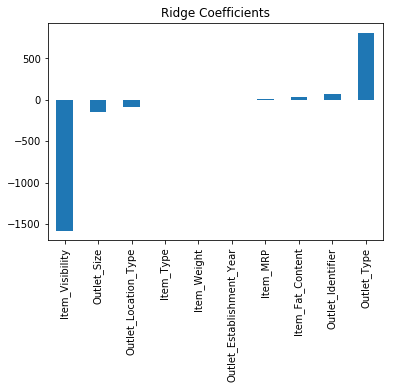

In [102]:
plot_coeficientes_ridge(0.01)

#### alpha = 0.5

Item_Visibility             -1653.448269
Outlet_Size                  -137.256947
Item_Type                      -1.436384
Item_Weight                    -0.119589
Outlet_Establishment_Year       2.404845
Item_MRP                       10.194457
Item_Fat_Content               21.081213
Outlet_Location_Type           38.576977
Outlet_Identifier              65.519153
Outlet_Type                   504.664792
dtype: float64


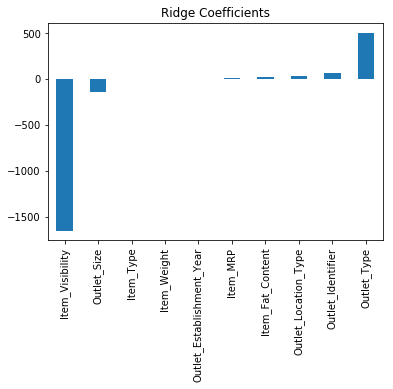

In [103]:
plot_coeficientes_ridge(0.5)

#### alpha = 10

Item_Visibility             -390.028909
Outlet_Size                  -33.485160
Item_Type                      0.135642
Item_Weight                    0.397922
Outlet_Establishment_Year      0.916275
Item_MRP                       1.390532
Item_Fat_Content               2.140546
Outlet_Identifier              9.159234
Outlet_Location_Type          14.016019
Outlet_Type                   76.462277
dtype: float64


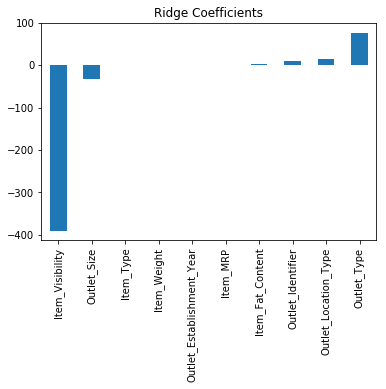

In [104]:
plot_coeficientes_ridge(10)

### Pontos Importantes

*   O parametro alpha controla a penalização e consequentemente a magnitude dos coeficientes é reduzida.
*   Encolhendo os coeficientes temos uma redução na complexidade do modelo.



### Lasso Regression

#### Importando e instânciando a classe Ridge

In [0]:
from sklearn.linear_model import Lasso

In [0]:
lassoReg = Lasso(alpha=0.05, normalize=True)

#### Treinando o modelo

In [107]:
lassoReg.fit(x_train,y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Realizando a predição e calculando as métricas

In [0]:
pred = lassoReg.predict(x_test)

In [109]:
mse = np.mean((pred - y_test)**2)
mse

1404411.1799729106

In [110]:
lassoReg.score(x_test,y_test)

0.5192834142273268

#### Verificação do impacto nos coeficientes de forma gráfica

In [0]:
def plot_coeficientes_lasso(alpha):
  lassoReg = Lasso(alpha=alpha, normalize=True)
  
  lassoReg.fit(x_train,y_train)
  
  predictors = x_train.columns
  
  coef = Series(lassoReg.coef_,predictors).sort_values()
  
  print(coef)
  
  coef.plot(kind='bar', title='Lasso Coefficients')

#### alpha = 0.01

Item_Visibility             -1555.495624
Outlet_Size                  -141.143113
Outlet_Location_Type          -97.417227
Item_Type                      -3.536577
Item_Weight                    -2.334040
Outlet_Establishment_Year       0.673112
Item_MRP                       15.292915
Item_Fat_Content               32.228123
Outlet_Identifier              60.794183
Outlet_Type                   823.639819
dtype: float64


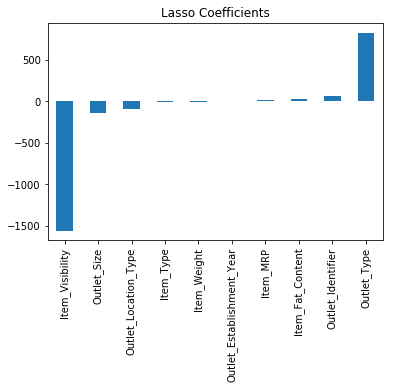

In [112]:
plot_coeficientes_lasso(0.01)

#### alpha = 0.5

Item_Visibility             -960.771222
Outlet_Size                  -74.007549
Item_Weight                   -0.000000
Item_Fat_Content               0.000000
Item_Type                     -0.000000
Outlet_Establishment_Year      0.000000
Outlet_Location_Type          -0.000000
Item_MRP                      14.665769
Outlet_Identifier             66.330949
Outlet_Type                  758.290120
dtype: float64


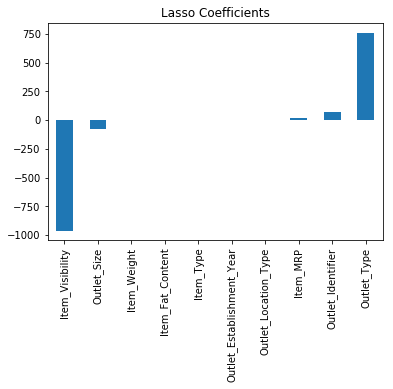

In [113]:
plot_coeficientes_lasso(0.5)

#### alpha = 1

Item_Visibility             -410.895182
Outlet_Size                  -10.035531
Item_Weight                   -0.000000
Item_Fat_Content               0.000000
Item_Type                     -0.000000
Outlet_Establishment_Year      0.000000
Outlet_Location_Type          -0.000000
Item_MRP                      14.044309
Outlet_Identifier             50.222425
Outlet_Type                  743.705587
dtype: float64


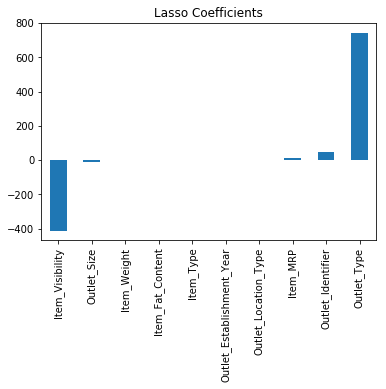

In [114]:
plot_coeficientes_lasso(1)

### Pontos Importantes

*   Mesmo com pequenos valores de alpha a magnitude dos coeficientes diminui muito.
*   O Lasso seleciona alguns atributos enquanto outros são reduzidos a zero (Feature Selection).

### Elastic Net Regression



#### Importando o objeto da ElasticNet

In [0]:
from sklearn.linear_model import ElasticNet

#### Instanciando a classe e treinando o modelo

In [117]:
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

#### Realizando as predicoes e calculando as métricas

In [0]:
pred = ENreg.predict(x_test)

In [119]:
mse = np.mean((pred - y_test)**2)

mse

1482514.0291639403

In [120]:
ENreg.score(x_test,y_test)

0.4925495519955037

### Pontos Importantes

*   A ElasticNet trabalha como uma combinacao entre a Ridge e a Lasso.
*   É interessante quando temos um grande dataset

In [0]:
def plot_coeficientes_elastic(alpha,l1):
  ENreg = ElasticNet(alpha=alpha, l1_ratio=l1, normalize=False)
  
  ENreg.fit(x_train,y_train)
  
  predictors = x_train.columns
  
  coef = Series(ENreg.coef_,predictors).sort_values()
  
  print(coef)
  
  coef.plot(kind='bar', title='Elastic Coefficients')

Outlet_Size                 -124.604797
Item_Visibility              -10.715054
Item_Type                     -3.202784
Item_Weight                   -2.311423
Outlet_Establishment_Year      4.963346
Item_Fat_Content              11.188328
Item_MRP                      15.288894
Outlet_Identifier            117.267370
Outlet_Location_Type         137.059670
Outlet_Type                  396.480284
dtype: float64


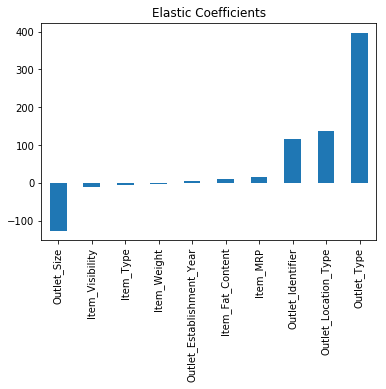

In [123]:
plot_coeficientes_elastic(1,0.5)

Item_Visibility             -1125.389783
Outlet_Size                  -143.180908
Outlet_Location_Type          -90.015962
Item_Type                      -3.565870
Item_Weight                    -2.358426
Outlet_Establishment_Year       0.480753
Item_MRP                       15.305110
Item_Fat_Content               30.118700
Outlet_Identifier              63.415956
Outlet_Type                   823.023692
dtype: float64


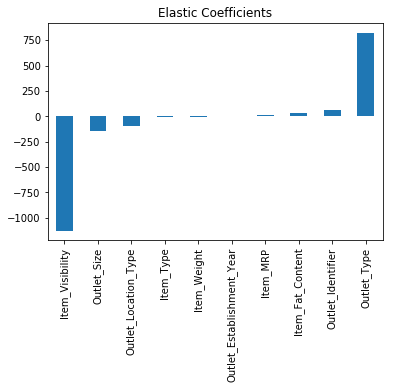

In [124]:
plot_coeficientes_elastic(1,1)

### Verificando de forma grafica os resultados

#### Importando as bibliotecas

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

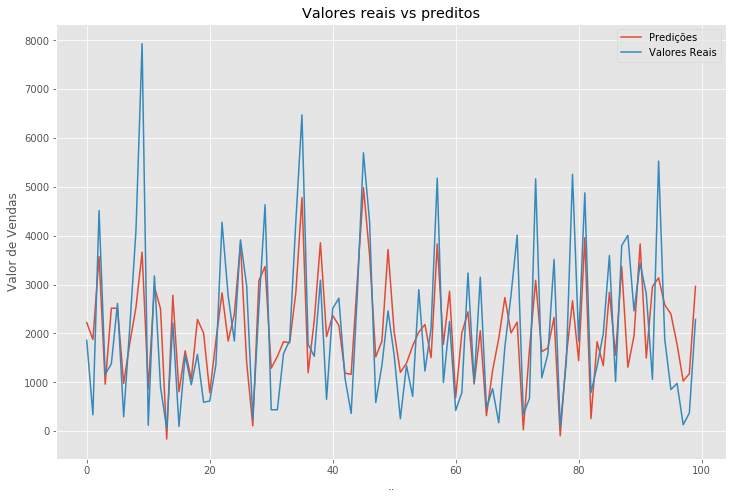

In [127]:
%matplotlib inline

predicoes = pd.DataFrame(pred[:100])


y_teste2= pd.DataFrame(y_test.values[:100])


plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.xlabel('..')
plt.ylabel('Valor de Vendas')
plt.title('Valores reais vs preditos')

plt.plot(y_teste2.index,predicoes)
plt.plot(y_teste2.index,y_teste2)

plt.legend(['Predições','Valores Reais'])
plt.show()